<a href="https://colab.research.google.com/github/alouwyck/dania-international-days/blob/main/artificial_intelligence/Intro_to_Artificial_Intelligence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

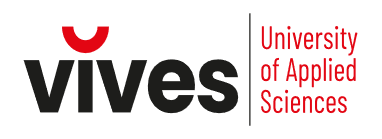<br>

**Dania International Days**<br>
13 - 15 March 2024<br><br>
Workshop by Dominique Stove & Andy Louwyck

---



---



# **INTRODUCTION TO ARTIFICIAL INTELLIGENCE WITH PYTHON**

This notebook is a brief introduction to artificial intelligence with Python. It discusses three well-known examples:
1. In the first example, the **A* search algorithm** is applied to find the optimal flight route between Brussels and Istanbul. This is an example of classical search and optimization, which is a subfield of AI that is not machine learning.
2. The second example applies **regression** to predict students' marks from the hours they have studied. It is an example of **supervised machine learning**.
3. In the third example, an **artificial neural network** is trained to classify handwritten digits. This is an example of **deep learning**.


## **Python Libraries**

We need the following libraries:
- **NumPy**: library for numerical computation.
- **Pandas**: library for analyzing structured data
- **GeoPandas**: library for analyzing geospatial data
- **Networkx**: library for analyzing complex networks
- **MatplotLib**: library for visualizing data
- **Pillow**: library for editing images
- **Scikit-Learn**: machine learning library
- **TensorFlow + Keras**: deep learning library

We import these libraries using the `import` command. It is customary to give NumPy alias `np`, Pandas alias `pd`, and Networkx alias `nx`. From MatplotLib, we need the `pyplot` module; the convention is to import it as `plt`.

In [19]:
from tensorflow import keras  # keras is TensorFlow's high-level API
import numpy as np  # numeric python
import pandas as pd  # python data analysis library
import geopandas  # python geospatial data analysis library
import networkx as nx  # python networks library
import PIL  # python imaging library
import matplotlib.pyplot as plt  # python library for visualizations
plt.rcParams["figure.dpi"] = 100  # set dpi of figures

From Scikit-Learn, we import the classes we use at the time we need them.

## **Finding the Optimal Route**

This example shows how the **A* search algorithm** is applied to find the optimal flight route between Brussels and Istanbul. In this case, the optimal route is the shortest route having the smallest total distance.

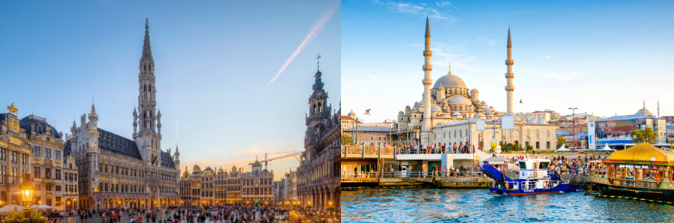

You have to fly from Brussels in Belgium to Istanbul in Turkey. The possible flight routes you may take are:

In [2]:
routes = [["Brussels", "Paris"],
          ["Brussels", "Berlin"],
          ["Brussels", "Bern"],
          ["Paris", "Bern"],
          ["Berlin", "Budapest"],
          ["Berlin", "Bern"],
          ["Bern", "Rome"],
          ["Bern", "Belgrade"],
          ["Rome", "Athens"],
          ["Rome", "Belgrade"],
          ["Belgrade", "Bucharest"],
          ["Belgrade", "Athens"],
          ["Budapest", "Belgrade"],
          ["Budapest", "Bucharest"],
          ["Athens", "Istanbul"],
          ["Bucharest", "Istanbul"]]

Departure and destination:

In [6]:
departure, destination = "Brussels", "Istanbul"

Using the following comprehension, we get a set containing all cities:

In [7]:
cities = {city for route in routes for city in route}
cities

{'Athens',
 'Belgrade',
 'Berlin',
 'Bern',
 'Brussels',
 'Bucharest',
 'Budapest',
 'Istanbul',
 'Paris',
 'Rome'}

We will use package GeoPandas to calculate the direct straight-line distances of the flight routes. This means we will calculate the distance [as the crow flies](https://en.wikipedia.org/wiki/As_the_crow_flies) between the two cities of each route.

GeoPandas is already installed in Google Colab. You can use the `'naturalearth_cities'` dataset to get the coordatines of each city:

In [8]:
path_to_data = geopandas.datasets.get_path("naturalearth_cities")
gdf = geopandas.read_file(path_to_data)
gdf.head()

<ipython-input-8-7c59a71dba71>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  path_to_data = geopandas.datasets.get_path("naturalearth_cities")


,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Lobamba,POINT (31.20000 -26.46667)
4,Luxembourg,POINT (6.13000 49.61166)


Variable `gdf` contains a `GeoDataFrame`, which is a Pandas DataFrame that has a `geometry` attribute:

In [9]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

Reducing the GeoDataFrame to the relevant cities:

In [10]:
gdf = gdf[gdf.name.isin(cities)]
gdf

,name,geometry
26,Bern,POINT (7.46698 46.91668)
112,Belgrade,POINT (20.46604 44.82059)
146,Budapest,POINT (19.08137 47.50195)
148,Bucharest,POINT (26.09800 44.43532)
170,Brussels,POINT (4.33137 50.83526)
197,Berlin,POINT (13.39960 52.52376)
204,Athens,POINT (23.73138 37.98527)
220,Istanbul,POINT (28.97428 41.01760)
226,Rome,POINT (12.48131 41.89790)
235,Paris,POINT (2.35299 48.85809)


In this case, the cities are [shapely](https://shapely.readthedocs.io/en/stable/manual.html) `POINT` objects and each point is characterized by its coordinates expressed in [latitude and longitude](https://en.wikipedia.org/wiki/Geographic_coordinate_system). Here is the code to get the coordinate of Brussels:

In [11]:
brussels = gdf[gdf.name == "Brussels"].geometry.iloc[0]  # selecting Brussels POINT from gdf
brussels.x, brussels.y  # (lon, lat)

(4.3313707, 50.8352629)

You can obtain the coordinate of Paris in the same way:

In [12]:
paris = gdf[gdf.name == "Paris"].geometry.iloc[0]  # selecting Paris POINT from gdf
paris.x, paris.y  # (lon, lat)

(2.3529924615392135, 48.85809231626911)

To calculate the distance as the crow flies between these two cities, you can use the following function:

In [13]:
import geopy.distance

def distance(city1, city2):
    # city1 and city2 are shapely.geometry.point.Point objects
    lat1, lon1 = city1.y, city1.x
    lat2, lon2 = city2.y, city2.x
    return int(geopy.distance.geodesic((lat1, lon1), (lat2, lon2)).meters / 1000)  # distance in km

Let's test the function using points `brussels` and `paris`:

In [14]:
distance(brussels, paris)

261

It returns 261 km, which is indeed the approximate distance as the crow flies between these two cities.

Using the `naturalearth_lowres` dataset, it is possible to plot the cities and the flight routes on a low-resolution map of Europe. The (lon, lat) coordinate is used to plot the cities and the routes. Note that GeoPandas applies Matplotlib for plotting:

<ipython-input-15-b9ec56001841>:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  map = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))


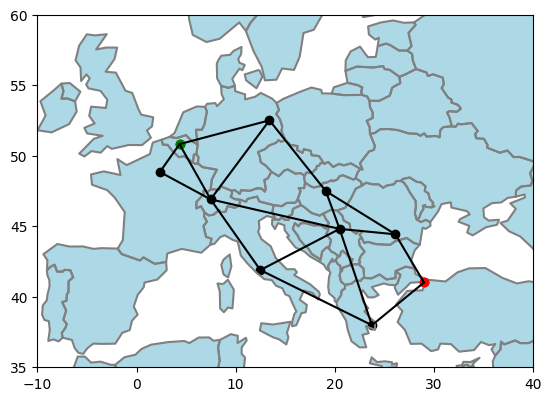

In [15]:
from matplotlib import pyplot as plt

# create figure and axes
_, ax = plt.subplots(1, 1);

# plot map
map = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
map.plot(color='lightblue', ax=ax);
map.boundary.plot(color='gray', ax=ax);

# plot cities
gdf.plot(color='black', ax=ax);
start = gdf[gdf.name==departure].geometry.iloc[0]
stop = gdf[gdf.name==destination].geometry.iloc[0]
plt.plot(start.x, start.y, 'go', stop.x, stop.y, 'ro');

# plot routes
for route in routes:
    city1 = gdf[gdf.name==route[0]].geometry.iloc[0]
    city2 = gdf[gdf.name==route[1]].geometry.iloc[0]
    plt.plot((city1.x, city2.x), (city1.y, city2.y), 'k-');

# zoom in on Europe
plt.xlim((-10, 40));
plt.ylim((35, 60));

Getting the coordinates of the cities:

In [16]:
coordinates = {city[1]['name']: (city[1].geometry.x, city[1].geometry.y)
               for city in gdf[['name', 'geometry']].iterrows()}

Now we will convert the map into a [**graph**](https://en.wikipedia.org/wiki/Graph_(abstract_data_type)), which consists of **nodes and edges**. First we define the edges of the graph:

In [17]:
edges = []
for route in routes:
    city1, city2 = route[0], route[1]
    dist = distance(gdf[gdf.name==city1].geometry.iloc[0],
                    gdf[gdf.name==city2].geometry.iloc[0])
    edges.append((city1, city2, dist))
edges

[('Brussels', 'Paris', 261),
 ('Brussels', 'Berlin', 654),
 ('Brussels', 'Bern', 492),
 ('Paris', 'Bern', 439),
 ('Berlin', 'Budapest', 690),
 ('Berlin', 'Bern', 755),
 ('Bern', 'Rome', 685),
 ('Bern', 'Belgrade', 1034),
 ('Rome', 'Athens', 1053),
 ('Rome', 'Belgrade', 723),
 ('Belgrade', 'Bucharest', 448),
 ('Belgrade', 'Athens', 806),
 ('Budapest', 'Belgrade', 316),
 ('Budapest', 'Bucharest', 641),
 ('Athens', 'Istanbul', 562),
 ('Bucharest', 'Istanbul', 446)]

The nodes of the graph correspond to the cities. The **heuristic value** of the cities is the straight-line distances between the city and the final destination:

In [18]:
heuristic = {city: int(distance(gdf[gdf.name==city].geometry.iloc[0],
                                gdf[gdf.name==destination].geometry.iloc[0]))
             for city in cities}
heuristic

{'Budapest': 1067,
 'Berlin': 1739,
 'Istanbul': 0,
 'Rome': 1379,
 'Bern': 1838,
 'Bucharest': 446,
 'Athens': 562,
 'Belgrade': 812,
 'Brussels': 2185,
 'Paris': 2259}

Now we are ready to create the graph that consists of the defined nodes and edges. The **cost** of each edge is determined by the actual distance of the route, while each node has the straight-line distance as attribute:

In [20]:
G = nx.Graph()
for node, h in heuristic.items():
    G.add_node(node, h=h)
for edge in edges:
    G.add_edge(edge[0], edge[1], cost=edge[2])

Plotting the graph:

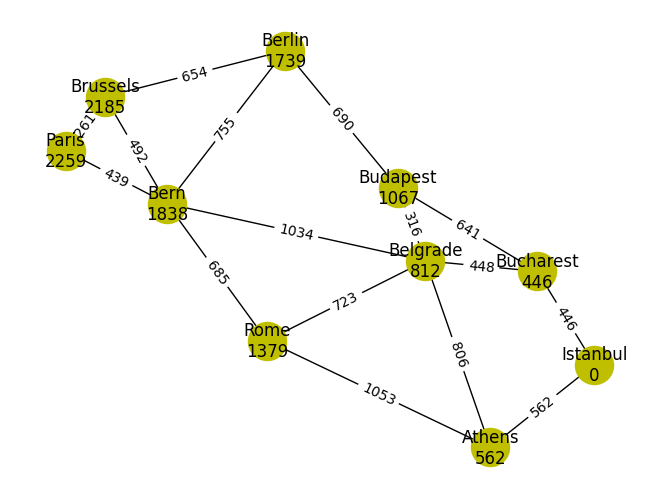

In [21]:
labels = {node: node + "\n" + str(h) for node, h in nx.get_node_attributes(G, 'h').items()}  # h toevoegen aan de node labels
nx.draw(G, coordinates, labels=labels, node_size=750, node_color="y")
nx.draw_networkx_edge_labels(
    G, coordinates, nx.get_edge_attributes(G, 'cost')
);

The **A* search algorithm** is implemented in Networkx:

In [24]:
from networkx.algorithms.shortest_paths import astar_path, astar_path_length

print('optimal route:', astar_path(G, source=departure, target=destination, weight="cost"))
print('total distance:', astar_path_length(G, source=departure, target=destination, weight="cost"))

optimal route: ['Brussels', 'Bern', 'Belgrade', 'Bucharest', 'Istanbul']
total distance: 2420


A* indeed finds the optimal flight route, which is the shortest route in this case. It has a total distance of 2420 km.

## **Regression**

Regression is a type of **supervised machine learning**. It is used to **predict quantitative variables**, such as house prices.

To illustrate how regression works, the `'Student_Marks.csv'` dataset is used. It can be downloaded from [Kaggle](https://www.kaggle.com/datasets/yasserh/student-marks-dataset), a popular online platform for data science and machine learning competitions, collaboration, and learning. The dataset is also used in a [paper](https://www.researchgate.net/publication/367540229_Study_of_the_Association_between_Study_Time_and_Final_Grades) published in the Journal of Education, Humanities and Social Sciences.



In [ ]:
import pandas as pd
df = pd.read_csv('Student_Marks.csv')
df.head()  # show the first 5 records

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


The `describe()` method provides a statistical summary of the DataFrame:

In [ ]:
df.describe().T  # T transposes the resulting table

,count,mean,std,min,25%,50%,75%,max
number_courses,100.0,5.29000,1.799523,3.000,4.0000,5.0000,7.00000,8.000
time_study,100.0,4.07714,2.372914,0.096,2.0585,4.0220,6.17925,7.957
Marks,100.0,24.41769,14.326199,5.609,12.6330,20.0595,36.67625,55.299


There are 100 samples and 3 features. Here, we want to predict the students' marks from the time they studied. So `'time_study'` is the independent variable, and `'Marks'` is the dependent variable or **target**.

Let's first make a scatterplot to visualize the relation between these two variables:

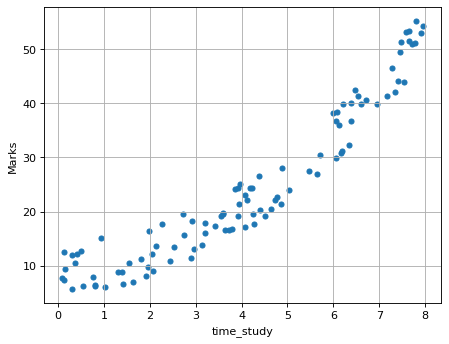

In [ ]:
df.plot.scatter(x='time_study', y='Marks');
plt.grid();

We clearly see the marks increase with the study time!

### Simple Linear Regression

Let's assume a **linear relation** between the study time, which we denote by $x$, and the marks, which we denote by $y$. Mathematically, this relation is expressed as follows:

> $y = ax + b$

where $a$ and $b$ are **parameters**. Note that this function expresses a straight line characterized by slope $a$ and intercept $b$. The parameters are derived by minimizing the squared differences between true marks $y$ and predicted marks $\hat{y}$:

> $L = \sum_{i=1}^n (y_i - \hat{y}_i)^2$

with $n$ the number of samples. $L$ is called the **loss function**. It is common to normalize the loss score by dividing it by the number of samples $n$, in which case it is called the **mean squared error** (MSE). Note that the difference between true and predicted value is called the **residual**.

Finding the optimal values for parameters $a$ and $b$ is called **simple linear regression**. It can be performed very easily using Scikit-Learn class `LinearRegression`:

In [ ]:
from sklearn.linear_model import LinearRegression

X, y = df[['time_study']].values, df.Marks.values  # feature X, target y

model = LinearRegression()  # instantiate class
model.fit(X, y)  # fit data
model.score(X, y)  # R² score

0.8878423939061949

We get a **R² score** of 0.89 which indicates the fit is relatively good. The coefficient of determination R² is always a value between 0 and 1, and the closer to 1, the better the fit.

Let's add the derived regression line to the scatter plot:

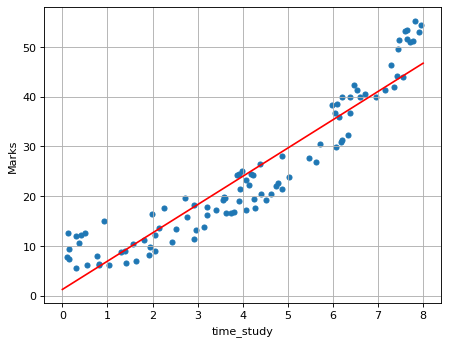

In [ ]:
df.plot.scatter(x='time_study', y='Marks');
xline = np.array([[0, 8]]).T  # must be 2D matrix!
yline = model.predict(xline)  # predict regression line
plt.plot(xline, yline, 'r-');
plt.grid();

Note that we created the regression line by predicting the `y`-values for `x = [0, 8]`. And what do we see? Well, the regression line is a good fit indeed. But can we do better?

### Polynomial Regression

Let's try **polynomial regression** which results in a curve that is not a straight line. The relation between $x$ and $y$ is non-linear in this case, and it is expressed by the following polynomial function:

> $y = b + a_1x + a_2x^2 + ... + a_nx^n = b + \sum_{i=1}^{n}a_ix^i$

where parameters $a_i$ and $b$, also called the **coefficients**, are derived again by minimizing an error function. The highest power $n$ is the **degree** of the polynomial. Note that $n=1$ in case of simple linear regression.

We may use the Scikit-Learn's `PolynomialFeatures` class to preprocess feature `X`, but using NumPy function `polyfit()` is more straightforward. Let's try a polynomial of degree 15:

In [ ]:
X = X.flatten()               # polyfit wants 1D array!
a = np.polyfit(X, y, deg=15)  # polynomial fit of degree 15

Using function `polyval()` the predictions can be calculated:

In [ ]:
from sklearn.metrics import r2_score  # import function to calculate R² score

yp = np.polyval(a, X)          # predictions
r2_score(y_true=y, y_pred=yp)  # R² score

0.9626851117937791

Now we get a R² score of 0.96, which indicates the polynomial fit is significantly better! Let's plot the corresponding regression curve:

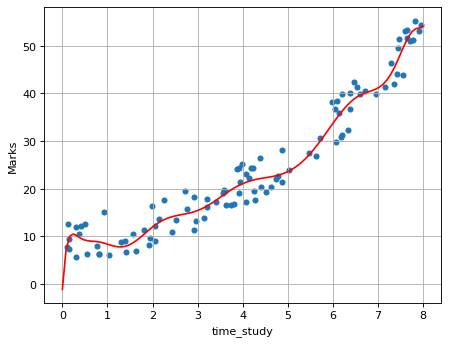

In [ ]:
xcurve = np.linspace(0, 8, 100)  # create 100 equally spaced points x between 0 and 8
ycurve = np.polyval(a, xcurve)   # predict y for these 100 points x
df.plot.scatter(x='time_study', y='Marks')
plt.plot(xcurve, ycurve, 'r-');
plt.grid();

Indeed, the polynomial fit captures the irregularities in the dataset better than the linear regression model. However, These irregularities can largely be attributed to **noise** in the data, and we do not want the model to take them into account!

### Underfitting and Overfitting

It's clear the linear regression model resulting in a straight line is too simple to express the relation between the study time and the marks. Actually, it is an example of **underfitting**. However, the polynomial model of degree 15 is too specific, and probably, it will not perform well on new data. This is called **overfitting**.

So how can we find the right model that does not suffer from underfitting nor overfitting? How do we obtain a good balance between **optimization**, which fits the data as best as possible during training, and **generalization**, which assures a good model performance on new data during inference?

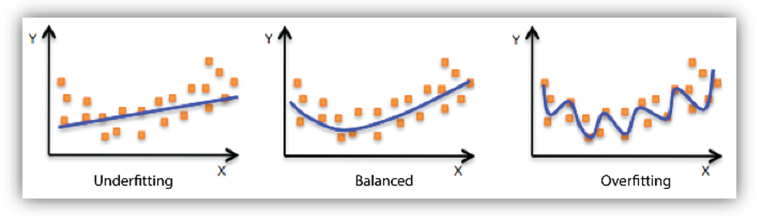

One best practice in machine learning is to reserve a part of the dataset for **validation** only. That implies a given dataset is split into a training set and a validation set, where the first is used to derive the optimal parameter values, and the latter to evaluate the trained model. In case of overfitting, the model will perform very well on the training data yet poorly on the validation data that are not being used to optimize the parameters.

Let's bring that into practice. First we import Scikit-Learn function `train_test_split()`:

In [ ]:
from sklearn.model_selection import train_test_split

Now we split the dataset into a training and validation set:

In [ ]:
X, y = df[['time_study']].values, df.Marks.values  # feature X, target y
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=0.4,      # 40% is used for validation
                                                  random_state=2024)  # set random seed

So 60% of the data are used to for training and the remaining 40% for validation. The selection of samples happens randomly. For didactic purposes, we've set the random seed; in practice, it is not recommended to do so. Also notice the use of the term *test* instead of *validate*. The difference between validation and testing will be addressed below.

Let's plot the data points used for training (blue) and validation (red) to see if they are randomly selected indeed:

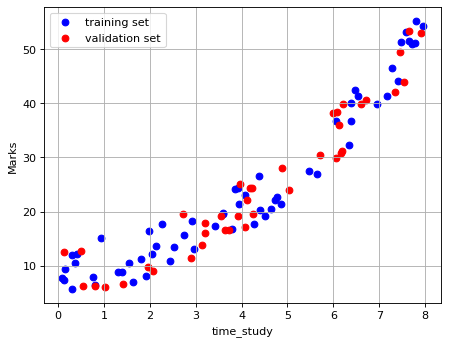

In [ ]:
plt.scatter(X_train.flatten(), y_train, color='blue', label='training set');
plt.scatter(X_val.flatten(), y_val, color='red', label='validation set');
plt.legend();
plt.xlabel('time_study');
plt.ylabel('Marks');
plt.grid();

Looks fine! Let's now illustrate how training and validation data are used by applying simple linear regression first, which we've already discussed above:

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print(f"training: {linreg.score(X_train, y_train)}")
print(f"validation: {linreg.score(X_val, y_val)}")

training: 0.890598635859595
validation: 0.8785060860504221


So the *fitting is performed on the training data only*, after which the resulting model is evaluated using both the training and validation data! It is seen the model still performs well: R² score is 0.89 and 0.88, respectively, for the training and the validation set.

How about fitting the data using a polynomial of degree 15, like we did before?

In [ ]:
a = np.polyfit(X_train.flatten(), y_train, deg=15)  # polynomial fit of degree 15
print(f"training: {r2_score(y_true=y_train, y_pred=np.polyval(a, X_train.flatten()))}")
print(f"validation: {r2_score(y_true=y_val, y_pred=np.polyval(a, X_val.flatten()))}")

training: 0.9732895781653086
validation: 0.9356553896196032


The model has a score of 0.97 on the training set, but a significantly lower score of 0.93 on the validation set, which indicates there is overfitting indeed.

To find the optimal degree of the polynomial fit, we can loop over a range of degrees, say from 1 to 20, while evaluating each model on both the training and validation set. The evaluation **metric** we will use here is the **mean absolute error** (MAE), which is defined in a very similar way as the MSE, except it considers the absolute value of the residuals instead of the square:

> $MAE = \frac{1}{n} \sum_{i=1}^n |y_i - \hat{y}_i|$

The MAE has the advantage that it is has the same unit as the target.

In [ ]:
from sklearn.metrics import mean_absolute_error as MAE  # import MAE function

mae_train = []  # list of MAEs of training data
mae_val = []    # list of MAEs of validation data
coef = []       # list of coefficients
degrees = range(1, 21)  # range of degrees of polynomial function

for degree in degrees:  # loop through degrees

    a = np.polyfit(X_train.flatten(), y_train, degree)  # polynomial fit of training data
    yp_train = np.polyval(a, X_train.flatten())         # predictions of training data
    yp_val = np.polyval(a, X_val.flatten())             # predictions of validation data

    coef.append(a)  # coefficients
    mae_train.append(MAE(y_true=y_train, y_pred=yp_train))  # MAE of training data
    mae_val.append(MAE(y_true=y_val, y_pred=yp_val))        # MAE of validation data

<ipython-input-44-9ec61abae9e1>:10: RankWarning: Polyfit may be poorly conditioned
  a = np.polyfit(X_train.flatten(), y_train, degree)  # polynomial fit of training data
<ipython-input-44-9ec61abae9e1>:10: RankWarning: Polyfit may be poorly conditioned
  a = np.polyfit(X_train.flatten(), y_train, degree)  # polynomial fit of training data


Let's plot the result using a Matplotlib animation:

In [ ]:
from matplotlib.animation import FuncAnimation
from matplotlib import rc
rc('animation', html='jshtml')

# initialization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # figure containing 2 axes
ax1.plot(X_train.flatten(), y_train, 'b.', label='training set');
ax1.plot(X_val.flatten(), y_val, 'r.', label='validation set');
ax1.legend();
xplot = np.linspace(0, 8, 1000)
regression_line = ax1.plot(xplot, np.polyval(coef[0], xplot),'k-')
ax1.set_title('degree = 1');
ax1.set_xlabel('time_study');
ax1.set_ylabel('Marks');
ax1.grid();
ax2.yaxis.set_label_position("right");
ax2.yaxis.tick_right();
mae_train_line = ax2.plot(degrees[0], mae_train[0], 'b.-', label='training');
mae_val_line = ax2.plot(degrees[0], mae_val[0], 'r.-', label='validation');
ax2.legend();
ax2.set_xlabel('Degree');
ax2.set_ylabel('MAE');
ax2.set_xlim((0, 21));
ax2.set_ylim((1, 5));
ax2.grid();

# update function for animation
def update(degree):
    yplot = np.polyval(coef[degree-1], xplot)
    regression_line[0].set_ydata(yplot)
    ax1.set_title('degree = ' + str(degree));
    mae_train_line[0].set_xdata(degrees[:degree])
    mae_train_line[0].set_ydata(mae_train[:degree])
    mae_val_line[0].set_xdata(degrees[:degree])
    mae_val_line[0].set_ydata(mae_val[:degree])

# create animation
ani = FuncAnimation(fig, update, frames=degrees, blit=False, repeat=True)
plt.close()
ani

The left plot displays the dataset along with the resulting regression curve, while the right plot illustrates the Mean Absolute Error (MAE) for both training and validation as a function of the polynomial degree. This right plot is commonly referred to as the **model complexity graph**. It quantifies the error in relation to the model's complexity, which primarily depends on the number of parameters. In other words, the more parameters, the more complex the model becomes. Here, the number of model parameters corresponds to the polynomial degree plus one. The degree itself is considered a **hyperparameter**, as it is set by the user rather than derived by the machine learning algorithm.

Let's plot the final version of the model complexity graph displaying all degrees:

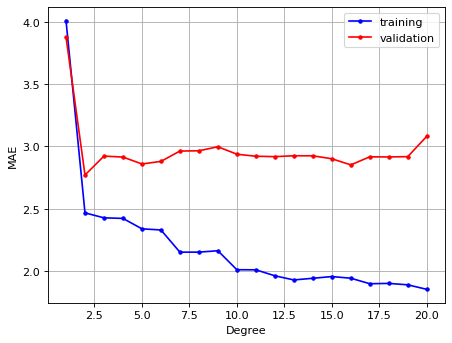

In [ ]:
plt.plot(degrees, mae_train, 'b.-', label='training');
plt.plot(degrees, mae_val, 'r.-', label='validation');
plt.legend();
plt.xlabel('Degree');
plt.ylabel('MAE');
plt.grid();

Upon closer examination of the model complexity graph, we observe that the blue curve (representing training MAE) consistently decreases with increasing degree. However, the red curve (indicating validation MAE) initially decreases but starts rising again beyond degree 3. This behavior suggests that overfitting occurs for degrees higher than 2, implying that the optimal degree for this model is 2! So we finally fit the complete dataset using a polynomial fit of degree 2 and evaluate this final model:

In [ ]:
a = np.polyfit(X.flatten(), y, deg=2)
yp = np.polyval(a, X.flatten())
MAE(y_true=y, y_pred=yp)

2.5925974596318717

We achieve a mean difference of 2.59 between the true and predicted marks when estimating students' performance based on the hours they have studied. Let's plot the resulting regression curve:

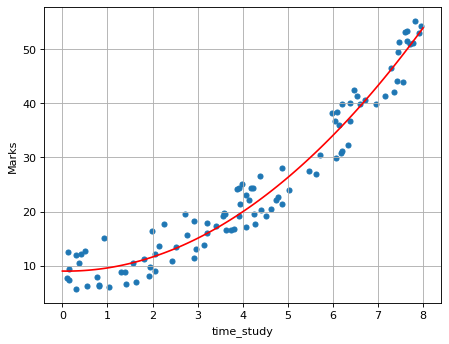

In [ ]:
df.plot.scatter(x='time_study', y='Marks');
xplot = np.linspace(0, 8, 100)
plt.plot(xplot, np.polyval(a, xplot), 'r-');
plt.grid();

The red polynomial function of degree 2 is a better fit than the best fitting straight line obtained from linear regression. On the other hand, it appears to be less affected by irregularities in the data than a high-degree polynomial fit is affected. In conclusion, it captures well the general relationship between students' study time and marks!

It is common practice to create a third dataset, the **test set**, which is used to evaluate the final model. While some hyperparameters are fine-tuned using the validation set, information may still leak from this set into the model. The test set remains free from any such information leaks, providing an excellent means to evaluate the model's performance on completely new data. Only when this final evaluation using the test set yields positive results can the model be confidently deployed.

## **Image Classification**

Neural networks are very successful in **computer vision**. In particular, **convolutional networks** (CNNs or convnets) have proven to be very efficient in recognizing patterns in images. In this notebook, we will demonstrate this with a classic example of **image classification**: classifying the handwritten digits from the MNIST dataset. This is also an example of **supervised learning**, but in this case, the predicted variable, the digit, is categorical; hence, the name classification.

First we will train a network with traditional dense layers on the dataset, after which we will try to improve the performance by using a network with convolutional layers. The neurons in such a layer do not calculate a weighted sum, but apply a mathematical operation called convolution. The same operation is also used, for example, to make photos blurrier or sharper. Think about applying filters in Instagram. Simply put, a convnet derives by itself the best filters from the given images, which allows for "recognizing" lines, colors, textures and objects. Based on that, it can classify the images.

Discussing the very technical details of neural networks is not within the scope of this workshop. Here, we just want you to experience the power and efficiency of neural networks. The example of classifying handwritten digits could be regarded as the 'hello world' of deep learning for computer vision. So, prepare yourself and set your hardware accelerator to GPU! (In Google Colab you can do this in the "Edit > Notebook settings" menu).

###MNIST dataset

The [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) of handwritten digits is available with Keras and can be downloaded from `datasets.mnist`:

In [ ]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


We notice 2 things:

- The dataset is divided into a training set and a test set according to the best machine learning practices. We only train models on the training set, and afterwards evaluate them using the test set.
- Image classification, like all other classification tasks, is a kind of *supervised learning*. So we need not only the images but also the associated labels.

Let's check how many examples are in the dataset:

In [ ]:
print(f"The training set constains {len(train_images)} images")
print(f"The test set contains {len(test_images)} images")

The training set constains 60000 images
The test set contains 10000 images


A total of 70,000 images... That's a lot bigger than the datasets from most of our previous examples, and it is even bigger than the IMDB dataset! Now let's take a look at how the dataset is constructed. As an example, let's take the fifth image from the training set:

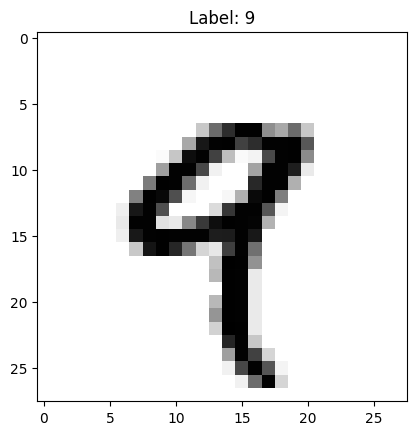

In [ ]:
digit = train_images[4]  # 5th image (index 4!)
plt.imshow(digit, cmap=plt.cm.binary)  # plot image
plt.title(f"Label: {train_labels[4]}");  # label for 5th image

It's interesting to notice that these images are actually NumPy arrays:

In [ ]:
type(digit)

numpy.ndarray

The images have a size of 28 by 28 pixels:

In [ ]:
digit.shape

(28, 28)

They are black and white images, so there is only one channel for the gray scale. RGB images, for instance, have three channels: one for red (R), one for blue (B), and one for green (G). These images would be 3D arrays. The data type of the elements is `uint8`, which stands for unsigned integer of 8 bits:

In [ ]:
digit.dtype

dtype('uint8')

Unsigned means that all elements are positive, and 8 bit implies there are $2^8$ or 256 possible values. As 0 is included, the maximum value is 255:

In [ ]:
digit.min(), digit.max()

(0, 255)

Each pixel is a feature and so we need to "reshape" the images. In other words, we need to put all the pixels of an image one after the other, so that they form one long row. Then we put the different images below each other and so we get a 'table' with in the rows the examples, here the images, and in the columns the features, here the 28 x 28 = 784 pixels.

In addition, we must normalize the pixel values to floats between 0 and 1. We do that simply by dividing the values by 255:

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))  # reshape
train_images = train_images.astype("float32") / 255  # normalize and convert to float
test_images = test_images.reshape((10000, 28 * 28))  # reshape
test_images = test_images.astype("float32") / 255  # normalize and convert to float

### Our own handwritten digit

The proof of the pudding is in the eating, so we saved our own handwritten digit as an image `"digit.png"`. We read the image using the static method `open` of class `Image` from the Pillow library, which we imported as `PIL`. We then get an `Image` object that we can "resize" to 28 by 28 pixels and convert to a black and white image. Since an image is actually an array containing the pixel values, we can convert it to a NumPy array, whose values we can easily convert to float values between 0 and 1:

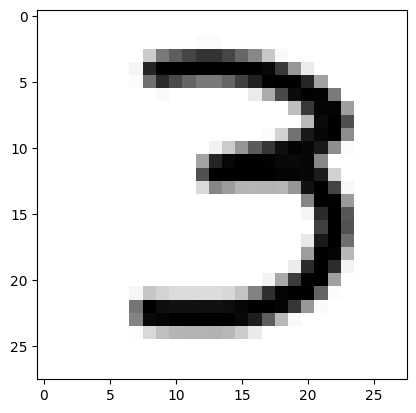

In [ ]:
import PIL  # Python image library
digit = PIL.Image.open("digit.png")  # read image
digit = digit.resize((28, 28))  # resize image to 28 x 28
digit = digit.convert('L')  # convert image to black and white (L = luminance)
digit = np.array(digit)  # convert image to numpy array
digit = 255 - digit  # turn black into whihte and white in to black
digit = digit.astype("float32") / 255.0  # normalize array
plt.imshow(digit, cmap=plt.cm.binary);  # plot digit

That looks fine! Wondering if our neural networks will recognize the digit....

### Dense neural network

We will now first build a network consisting of 'classical' `Dense` layers. We instantiate a so-called `Sequential` model that consists of a sequence of layers. We will define 3 layers:

- The *input layer* that accepts the converted images. The input size is thus `(None, 784)`, where the `None` refers to the number of images processed during one iteration of the algorithm. That number is called the *batch size*.
- A *hidden layer* that consists of 512 neurons and applies `"relu"` (rectified linear unit) as the activation function.
- The *output layer* that consists of 10 neurons because we have 10 classes. There are 10 classes because there are 10 digits: from 0 to 9. So each neuron in the output layer corresponds to a digit. The `"softmax"` activation function lets each neuron in the output layer return a probability as output. The neuron with the highest probability indicates the digit that the model predicts.

It's important to realize that we are dealing here with **multi-class classification** instead of binary classification as we have more than 2 classes. So the softmax function could be seen as the generalized form of the sigmoid function for multi-class classification.

In [ ]:
from tensorflow import keras  # keras is tensorflow's high-level api!
model = keras.Sequential([
 keras.layers.Dense(512, activation="relu"),  # hidden layer consisting of 512 neurons and relu as activation
 keras.layers.Dense(10, activation="softmax")  # output layer consisting of 10 neurons and softmax as activation
])

model.build(input_shape=(None, 28 * 28))  # number of neurons for the input layer
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


We see that the model consists of 407,050 parameters! Compare this to single linear regression where the algorithm had to derive only 2 parameters....

Before we can begin training the model, we must first compile it. We need to specify what loss function the algorithm should use, and what optimizer it must apply to minimize that loss function. Explaining what exactly `"sparse_categorical_crossentropy"` means is out of scope, but keep in mind it is used as a loss function for multi-class classification models in which labels are represented as integers, like here.

We will also specify that we want the accuracy to be calculated after each epoch. Of course, we already know the `"accuracy"` metric: it is the number of correctly classified images divided by the total number of images.

And we also know what an *epoch* is. Indeed, the algorithm will repeatedly go through the entire dataset to optimize the parameters. When the algorithm has fully processed the dataset one time, it has completed one epoch.

In [ ]:
model.compile(
    loss="sparse_categorical_crossentropy",  # loss function that calculates difference between predicted and true labels
    optimizer="rmsprop",  # algorithm that minimizes the loss function
    metrics=["accuracy"]  # calculate accuracy after each iteration (epoch)
  )

Voila, we are ready to train the model. Just like with Scikit-Learn, with Keras we also call the method `fit`, and we pass the features and labels to it: `train_images` and `train_labels`. So we use only the training set! We also need to specify the number of epochs and the batch size. In this case, 5 epochs will suffice and we let the algorithm process 128 images at once.

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128);  # training the model using the training set

Epoch 1/5
469/469 [==============================] - 6s 12ms/step - loss: 0.2657 - accuracy: 0.9245
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1059 - accuracy: 0.9688
Epoch 3/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0695 - accuracy: 0.9795
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0511 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0379 - accuracy: 0.9889


The model achieves a very high accuracy of almost 99%! But does it perform as well on the test set?

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)  # evaluate model using the test set
print(f"accuracy on the test set: {test_acc}")

313/313 [==============================] - 2s 5ms/step - loss: 0.0682 - accuracy: 0.9784
accuracy on the test set: 0.9783999919891357


The accuracy on the test is also very high! So that looks good!

Should the accuracy of the test set be much lower, our model would suffer from **overfitting**. As we already know, we basically need to use a third set to detect overfitting: the validation set. In that case, the loss (and accuracy) is calculated during training for both the validation set and the training set after each epoch. From the moment the loss of the training set keeps decreasing, while that of the validation set does not or even starts to increase, we need to stop. For this example, we figured out in advance that we should stop after about 5 epochs, and therefore, we did not validate the model.

Since overfitting is a fundamental problem in machine learning and deep learning, several regularization techniques are available to avoid it! However, explaining these techniques is not within the scope of this workshop.

Let us now test whether the neural network effectively recognizes our own handwritten digit. Just like with Scikit-Learn, we also use method `predict` and pass our image as input. Of course, we also need to reshape this image into a long row of pixels:

In [ ]:
probs = model.predict(digit.reshape(1, -1))  # predict returns 10 probabilities
probs[0]

1/1 [==============================] - 0s 58ms/step


array([2.9876305e-06, 4.3787732e-06, 3.9882454e-04, 9.9959117e-01,
       1.3545465e-10, 8.9304763e-07, 1.9179638e-10, 1.5312692e-08,
       1.5813225e-06, 1.8432421e-07], dtype=float32)

We get 10 probabilities as output indeed. So that's 10 numbers between 0 and 1 that we have to interpret as percentages. We see the fourth element is the largest number. Since we start from digit 0, the fourth element corresponds to digit 3, which has the highest probability:

In [ ]:
prob = np.max(probs) * 100  # largest probability
n = np.argmax(probs)  # index (= digit) corresponding to the largest probability
print(f"The neural network is for {prob:.2f} % sure the digit is {n}!")

The neural network is for 99.96 % sure the digit is 3!


### Convolutional neural network

In theory, a convnet or CNN performs even better than a `classical` network with dense layers. Let's check that out using the following model that consists of 3 `Conv2D` layers, each separated by a `MaxPooling2D` layer. The first layers apply the convolutional "filters", the second perform some kind of compression. Discussing in detail how these layers work is out of scope.

Unlike the previous model, we don't have to reshape the input images into a long row of pixels. No, because we are applying these "filters", the images should remain rectangular. Hence, the input shape of the input layer is 28 by 28. The number of color channels is also taken into account, but since we are dealing with black and white images, that number is 1.

The output layer is the same as the one in our previous model: a `Dense` layer with 10 neurons, and the softmax function that will give probabilities as output. The `Flatten` layer that comes just before the output layer has the sole function of converting the `rectangular` output of the last convolutional layer to 1 long row, which can be passed to the last `Dense` output layer.

In [ ]:
model = keras.Sequential([
  keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"),
  keras.layers.MaxPooling2D(pool_size=2),
  keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu"),
  keras.layers.MaxPooling2D(pool_size=2),
  keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu"),
  keras.layers.Flatten(),
  keras.layers.Dense(10, activation="softmax")  # output layer consisting of 10 neurons and softmax as activation
])

model.build(input_shape=(None, 28, 28, 1))  # input consists of images of 28 x 28 pixels en 1 color channel
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 1152)             

Now we compile the model in the same way as the previous model:

In [ ]:
model.compile(
    loss="sparse_categorical_crossentropy",  # loss function
    optimizer="rmsprop",  # optimizer
    metrics=["accuracy"]  # accuracy as metric
  )

Before we can start training the model, we must "reshape" the training and test set to shape `(60000, 28, 28, 1)` and `(10000, 28, 28, 1)`, respectively:

In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

We are ready now to train the model. Again, we take 5 epochs, and this time, set the batch size to 64:

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=64);

Epoch 1/5
938/938 [==============================] - 55s 58ms/step - loss: 0.1598 - accuracy: 0.9509
Epoch 2/5
938/938 [==============================] - 54s 57ms/step - loss: 0.0465 - accuracy: 0.9854
Epoch 3/5
938/938 [==============================] - 53s 56ms/step - loss: 0.0318 - accuracy: 0.9903
Epoch 4/5
938/938 [==============================] - 53s 56ms/step - loss: 0.0240 - accuracy: 0.9923
Epoch 5/5
938/938 [==============================] - 53s 56ms/step - loss: 0.0187 - accuracy: 0.9944


We already achieved a very high accuracy using the previous neural network, but the convnet performs even slightly better!

And what is its accuracy on the test set?

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"accuracy on the test set: {test_acc}")

313/313 [==============================] - 4s 11ms/step - loss: 0.0298 - accuracy: 0.9906
accuracy on the test set: 0.9905999898910522


That accuracy is also slightly better!

Finally, we test the new model on our own image with handwritten digit. We may not forget to add an extra dimension. For example, we can do this as follows:

> `digit = digit[np.newaxis, :, :]`

In [ ]:
probs = model.predict(digit[np.newaxis, :, :])  # add extra dimension!
prob = np.max(probs) * 100
n = np.argmax(probs)
print(f"The convnet is for {prob:.2f} % sure that the digit is {n}!")

1/1 [==============================] - 0s 81ms/step
The convnet is for 100.00 % sure that the digit is 3!


Nice! After rounding the probability, it turns out the model is 100% sure our digit is 3!


---



---
## **References**

- Serrano, L.G., 2021. [Grokking Machine Learning](https://www.manning.com/books/grokking-machine-learning). Manning Publication.
- Chollet, F., 2022. [Deep Learning with Python (2nd ed.)](https://www.manning.com/books/deep-learning-with-python-second-edition). Manning Publication.
- [GeoPandas User Guide](https://geopandas.org/en/stable/). Consulted on March 9, 2024.
- [Networkx User Guide](https://networkx.org/). Consulted on March 9, 2024.
- [Scikit-Learn User Guide](https://scikit-learn.org/stable/user_guide.html). Consulted on Februari 18, 2024.

---